# Data Assignment 

How is participating during the elections on Twitter?? 

- Compared to Arcom/CSA dataset [here](https://www.csa.fr/Proteger/Garantie-des-droits-et-libertes/Proteger-le-pluralisme-politique/La-presidentielle-2022)
- Compared to Factiva dataset: only the distribution???

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Twitter

### Accounts of the French Presidential candidates

Do we use Macron??

No political party for Lassale. 

In [14]:
twitter_candidates={'zemmour': ['@ZemmourEric', '@Reconquete2022'], 
                    'le_pen':['@MLP_officiel', '@RNational_off'], 
                   'roussel': ['@Fabien_Roussel', '@PCF'], 
                   'melenchon' : ['@JLMelenchon', '@FranceInsoumise'], 
                   'jadot':['@yjadot', '@EELV'], 
                   'hidalgo':['@Anne_Hidalgo', '@partisocialiste'], 
                   'pecresse':['@vpecresse', '@lesRepublicains'], 
                   'poutou':['@PhilippePoutou', '@NPA_officiel'], 
                   'arthaud':['@n_arthaud', '@LutteOuvriere'],
                   'lassale':['@jeanlassalle'], 
                   'dupont_aignan':['@dupontaignan', '@DLF_Officiel']}

We can then retrieve the tweets mentionning them, using several conditions:
- Date until:2022-03-14 since:2022-01-01
- number of retweets: >100

### Retrieving tweets using Minet - Medialab tool

[Minet & Twitter documentation](https://github.com/medialab/minet/blob/master/docs/twitter.md)

[Twitter advanced search doc](https://twitter.com/search-advanced?f=live)

In [15]:
import minet
from minet.twitter import TwitterAPIScraper
scraper = TwitterAPIScraper()

In [16]:
def retrieve_tweets_cont_username(username):
    """
    @Inputs: username, str
    
    @Outputs: list of tweets
    """

    #Initialising a temp list:
    l_temp = []
    #Retriving the tweets containing the username:
    
    query = str('('+username+') min_retweets:100 until:2022-03-14 since:2022-01-01')
    #(#zemmour2022) min_retweets:100 until:2022-03-15 since:2022-01-01'):
    
    for tweet in scraper.search_tweets(query):
        l_temp.append(tweet)
    return l_temp


def create_df_from_tweets(l_temp, candidate):
    """
    @Inputs: 
        - l_temp, list of tweets (raw)
    
    @Outputs: 
        - df, clean, with tweets and candidate
    """
    
    
    #We are using the keys not containing any list:
    list_keys=['id', 'local_time', 'timestamp_utc', 'text', 'url', 'quoted_id', 'quoted_user', 'quoted_user_id', 
               'quoted_timestamp_utc', 'retweeted_id', 'retweeted_user', 'retweeted_user_id', 'retweeted_timestamp_utc', 
               'links_to_resolve', 'collection_time', 'match_query', 'coordinates', 
               'to_tweetid', 'to_username', 'to_userid', 'lang', 'possibly_sensitive', 'retweet_count', 'like_count', 
               'reply_count', 'user_id', 'user_screen_name', 'user_name', 'user_friends', 'user_followers', 
               'user_location', 'user_verified', 'user_description', 'user_created_at', 'user_tweets', 'user_likes', 
               'user_lists', 'user_image', 'user_url', 'user_timestamp_utc', 'source_url', 'source_name']
    
    #Init an empty dataframe:
    df_ = pd.DataFrame()
    #Loop over the raw tweets in l_temp
    for el in l_temp:
        #Creating an empty dict
        dict_temp={}
        #Looping over the selected keys
        for k in list_keys:
            #If the key exist, we retrieve the element 
            try:
                dict_temp[k]=el[k]
            #Else
            except:
                #do nothing
                pass
        #Creating an empty dataframe of only one row (the tweet we are looping over from el in df_temp)
        df_temp=pd.DataFrame(data=[dict_temp])
        #Concat the previously treated tweets and the new one
        df_=pd.concat([df_, df_temp])
        
    #Indicating the candidate's name:
    df_['candidate']=candidate
    
    #We can return the DataFrame:
    return df_

### Applying the functions

In [50]:
def main_tweets():
    df_tweets = pd.DataFrame()
    for candidate in twitter_candidates.keys():
        print('-----------------------')
        print(candidate)
        for username in twitter_candidates[candidate]:
            print(username)
            l_temp = retrieve_tweets_cont_username(username)
            print(len(l_temp))
            df_ = create_df_from_tweets(l_temp, candidate)
            df_tweets = pd.concat([df_tweets, df_])
    return df_tweets

In [52]:
%time df_tweets = main_tweets()

-----------------------
zemmour
@ZemmourEric
3838
@Reconquete2022
260
-----------------------
le_pen
@MLP_officiel
1229
@RNational_off
163
-----------------------
roussel
@Fabien_Roussel
314
@PCF
31
-----------------------
melenchon
@JLMelenchon
2546
@FranceInsoumise
115
-----------------------
jadot
@yjadot
315
@EELV
27
-----------------------
hidalgo
@Anne_Hidalgo
297
@partisocialiste
27
-----------------------
pecresse
@vpecresse
1074
@lesRepublicains
230
-----------------------
poutou
@PhilippePoutou
127
@NPA_officiel
7
-----------------------
arthaud
@n_arthaud
24
@LutteOuvriere
1
-----------------------
lassale
@jeanlassalle
21
-----------------------
dupont_aignan
@dupontaignan
224
@DLF_Officiel
1
Wall time: 8min 9s


,id,local_time,timestamp_utc,text,url,quoted_id,quoted_user,quoted_user_id,quoted_timestamp_utc,retweeted_id,...,user_tweets,user_likes,user_lists,user_image,user_url,user_timestamp_utc,source_url,source_name,possibly_sensitive,candidate
0,1503136657918377990,2022-03-13T22:31:20,1647210680,En ces #48HdelaReconquete j'ai décroché mon té...,https://twitter.com/AnthoMICHEL54/statuses/150...,None,None,None,None,None,...,3223,13286,0,https://pbs.twimg.com/profile_images/146737661...,None,1503569278,https://mobile.twitter.com,Twitter Web App,NaN,zemmour
0,1503134684427042816,2022-03-13T22:23:30,1647210210,@ZemmourEric à réussi à rassembler 3 génératio...,https://twitter.com/sco_pan/statuses/150313468...,None,None,None,None,None,...,11803,13546,9,https://pbs.twimg.com/profile_images/150335820...,None,1377270078,http://twitter.com/download/android,Twitter for Android,False,zemmour
0,1503131518641836041,2022-03-13T22:10:55,1647209455,Merci à mes militants pour ces #48HdelaReconqu...,https://twitter.com/ZemmourEric/statuses/15031...,None,None,None,None,None,...,5949,613,1193,https://pbs.twimg.com/profile_images/150414107...,https://www.zemmour2022.fr/,1570983990,http://twitter.com/download/iphone,Twitter for iPhone,False,zemmour
0,1503131150436519947,2022-03-13T22:09:27,1647209367,35 ans que la France attend une véritable cand...,https://twitter.com/Marie_Lin777/statuses/1503...,None,None,None,None,None,...,29269,7123,52,https://pbs.twimg.com/profile_images/149880365...,None,1315855544,https://mobile.twitter.com,Twitter Web App,NaN,zemmour
0,1503123918961393670,2022-03-13T21:40:43,1647207643,Ce week end à Paris se tenait un meeting de so...,https://twitter.com/Portes_Thomas/statuses/150...,None,None,None,None,None,...,34831,7992,280,https://pbs.twimg.com/profile_images/150292750...,https://thomasportes.com,1394549893,http://twitter.com/download/iphone,Twitter for iPhone,NaN,zemmour
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,1477595526992478210,2022-01-02T11:00:00,1641121200,Scandaleux ! Sebastien Huyghe (LR) propose en ...,https://twitter.com/dupontaignan/statuses/1477...,None,None,None,None,None,...,24222,744,2005,https://pbs.twimg.com/profile_images/672054572...,http://www.2022nda.fr,1241614288,https://mobile.twitter.com,Twitter Web App,False,dupont_aignan
0,1477315236931715073,2022-01-01T16:26:14,1641054374,Face à ce gouv. qui ne maîtrise rien #Covid_19...,https://twitter.com/MartineWonner/statuses/147...,None,None,None,None,None,...,3187,13951,527,https://pbs.twimg.com/profile_images/147355620...,https://www.martinewonner.fr/,1496310697,http://twitter.com/download/android,Twitter for Android,False,dupont_aignan
0,1477305376731238408,2022-01-01T15:47:03,1641052023,900 #voitures ont #brûlé pendant la nuit de la...,https://twitter.com/dupontaignan/statuses/1477...,None,None,None,None,None,...,24222,744,2005,https://pbs.twimg.com/profile_images/672054572...,http://www.2022nda.fr,1241614288,http://twitter.com/download/iphone,Twitter for iPhone,NaN,dupont_aignan
0,1477278435613446146,2022-01-01T14:00:00,1641045600,"✍🏻Je vous invite, au nom de nos libertés à sig...",https://twitter.com/dupontaignan/statuses/1477...,None,None,None,None,None,...,24222,744,2005,https://pbs.twimg.com/profile_images/672054572...,http://www.2022nda.fr,1241614288,https://mobile.twitter.com,Twitter Web App,False,dupont_aignan


In [53]:
%time df_tweets = main_tweets()

-----------------------
zemmour
@ZemmourEric
3838
@Reconquete2022
259
-----------------------
le_pen
@MLP_officiel
1229
@RNational_off
163
-----------------------
roussel
@Fabien_Roussel
314
@PCF
31
-----------------------
melenchon
@JLMelenchon
2543
@FranceInsoumise
115
-----------------------
jadot
@yjadot
315
@EELV
27
-----------------------
hidalgo
@Anne_Hidalgo
297
@partisocialiste
27
-----------------------
pecresse
@vpecresse
1074
@lesRepublicains
230
-----------------------
poutou
@PhilippePoutou
127
@NPA_officiel
7
-----------------------
arthaud
@n_arthaud
24
@LutteOuvriere
1
-----------------------
lassale
@jeanlassalle
21
-----------------------
dupont_aignan
@dupontaignan
224
@DLF_Officiel
1
Wall time: 8min 7s


In [54]:
#Saving df_tweets as csv:
df_tweets.to_csv('data/tweets/df_tweets_16032022.csv')

In [59]:
df_tweets.shape

(10867, 43)

In [2]:
df_tweets = pd.read_csv('data/tweets/df_tweets_16032022.csv')

In [3]:
df_tweets.columns

Index(['Unnamed: 0', 'id', 'local_time', 'timestamp_utc', 'text', 'url',
       'quoted_id', 'quoted_user', 'quoted_user_id', 'quoted_timestamp_utc',
       'retweeted_id', 'retweeted_user', 'retweeted_user_id',
       'retweeted_timestamp_utc', 'links_to_resolve', 'collection_time',
       'match_query', 'coordinates', 'to_tweetid', 'to_username', 'to_userid',
       'lang', 'retweet_count', 'like_count', 'reply_count', 'user_id',
       'user_screen_name', 'user_name', 'user_friends', 'user_followers',
       'user_location', 'user_verified', 'user_description', 'user_created_at',
       'user_tweets', 'user_likes', 'user_lists', 'user_image', 'user_url',
       'user_timestamp_utc', 'source_url', 'source_name', 'possibly_sensitive',
       'candidate'],
      dtype='object')

#### To_print

In [9]:
df_tweets_to_print = df_tweets[['candidate', 'id', 'local_time', 'text', 'retweet_count', 'like_count', 'reply_count', 'user_id', 'user_name', 'user_description']].sample(500)

In [10]:
df_tweets_to_print

,candidate,id,local_time,text,retweet_count,like_count,reply_count,user_id,user_name,user_description
2633,zemmour,1485519399771680770,2022-01-24T07:46:39,#DEBATGG\n\n🇫🇷 Proposition de @ZemmourEric : F...,419,357,243,114512948,Les Grandes Gueules,"Du lundi au vendredi, 9h-12h sur @RMCinfo 📻 et..."
8855,hidalgo,1502372182722326534,2022-03-11T19:53:35,"Changer nos vies, nous l’avons déjà fait et, e...",143,240,70,26073581,Anne Hidalgo,Maire de @Paris | Candidate à la présidence de...
8717,jadot,1487045766208278528,2022-01-28T12:51:53,"Cher @JLMelenchon, quand un fasciste vous parl...",209,792,930,117761523,Yannick Jadot,Candidat à l'élection présidentielle 🇫🇷 Écolog...
4913,le_pen,1488226363400196097,2022-01-31T19:03:09,📹 Le taux d'homicides et de tentatives d'homic...,173,445,26,217749896,Marine Le Pen,Candidate à la Présidence de la République | D...
9430,pecresse,1497998074731540489,2022-02-27T18:12:27,⚠️TWEET DE L'AMBASSADE DE CHINE EN RUSSIE\nDe ...,651,1077,51,200659061,François Asselineau,Candidat INTERDIT à la présidentielle https://...
...,...,...,...,...,...,...,...,...,...,...
4835,le_pen,1490016003258032128,2022-02-05T17:34:32,"Je ne veux pas polémiquer, mais 3000 personnes...",184,458,18,2811378813,Pierre de SAULIEU ن ⓩ,Ancien Elu à @villedenancy\nEx-LR\nResp Reg Gr...
891,zemmour,1496805957124374530,2022-02-24T11:15:24,"En conférence de presse, @ZemmourEric appelle ...",510,1378,64,1192452617936527362,Victor Chabert,Journaliste au service politique d’@europe1
9792,pecresse,1489646424652496898,2022-02-04T17:05:58,Curieuse époque où l’on disserte davantage sur...,502,1503,288,520259649,Julien Aubert,Député 5e circo #Vaucluse • Président d'@Oserl...
5319,le_pen,1477535180504150019,2022-01-02T07:00:12,"Voilà, comme ça on n'en parle plus ! . #ArcDeT...",202,982,50,921331686239096832,Reda ZITOUNI,Ex Assemblee Nationale 🇨🇵 • Enfant de la Répub...


In [11]:
df_tweets_to_print.to_csv('to_print/tweets_print.csv')

### Draft

In [46]:
df_['local_time'] = pd.to_datetime(df_['local_time']).dt.date

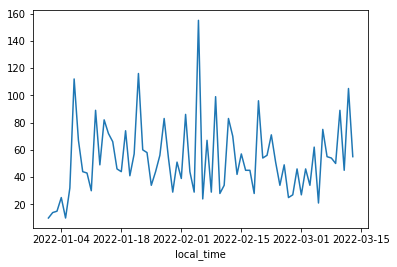

In [49]:
df_.groupby('local_time').count()['id'].plot()

## Factiva

"Prénom nom"

Du 01/01/2022 au 14/03/2022

Rechercher en texte libre dans: "Titre et premier paragraphe"

Doublons: "similaire"


**Pour L'instant: TOUS LES DOCUMENTS!!!**

--> il faudrait peut-être faire des distinctions (Publications papier/sites web....)

## ARCOM / CSA

They can be found on that page: 
https://www.csa.fr/Proteger/Garantie-des-droits-et-libertes/Proteger-le-pluralisme-politique/La-presidentielle-2022

Updated every two weeks, so we can infer the time for every two weeks period, for each considered candidate. 

In [ ]:
headers = []


splitted = name.split('_')
day = splitted[1]
month = splitted[2]
date_fin = 

## Polls

Do that matter ?? Comparing the polls, internet visibility and participation as well as media

[nsppolls](https://github.com/nsppolls/nsppolls)

The csv file with every polls for the election:

https://raw.githubusercontent.com/nsppolls/nsppolls/master/presidentielle.csv

In [55]:
df_polls = pd.read_csv('https://raw.githubusercontent.com/nsppolls/nsppolls/master/presidentielle.csv')

In [56]:
df_polls.head()

,candidat,parti,intentions,erreur_sup,erreur_inf,id,nom_institut,commanditaire,debut_enquete,fin_enquete,echantillon,population,rolling,media,tour,hypothese,sous_echantillon
0,Marine Le Pen,Rassemblement national,16.0,18.0358,13.9642,20220102_0105_ow,Opinion Way,"Les Echos, Radio Classique, Kea Partners",2022-01-02,2022-01-05,1501,Inscrits sur les listes électorales,True,True,Premier tour,NaN,1245.83
1,Anne Hidalgo,Parti socialiste,4.0,5.0882,2.9118,20220102_0105_ow,Opinion Way,"Les Echos, Radio Classique, Kea Partners",2022-01-02,2022-01-05,1501,Inscrits sur les listes électorales,True,True,Premier tour,NaN,1245.83
2,Jean-Luc Mélenchon,France insoumise,9.0,10.5892,7.4108,20220102_0105_ow,Opinion Way,"Les Echos, Radio Classique, Kea Partners",2022-01-02,2022-01-05,1501,Inscrits sur les listes électorales,True,True,Premier tour,NaN,1245.83
3,Nicolas Dupont-Aignan,Debout la France,2.0,2.7774,1.2226,20220102_0105_ow,Opinion Way,"Les Echos, Radio Classique, Kea Partners",2022-01-02,2022-01-05,1501,Inscrits sur les listes électorales,True,True,Premier tour,NaN,1245.83
4,Arnaud Montebourg,NaN,1.0,1.5525,0.4475,20220102_0105_ow,Opinion Way,"Les Echos, Radio Classique, Kea Partners",2022-01-02,2022-01-05,1501,Inscrits sur les listes électorales,True,True,Premier tour,NaN,1245.83


In [57]:
df_polls.shape

(7141, 17)

In [58]:
#Saving df_polls as csv:
df_polls.to_csv('data/polls/df_polls.csv')